<a href="https://colab.research.google.com/github/julioclerio/ml_admission_prediction/blob/main/notebooks/ml_II_ex_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Admission_Predict.csv

Exercício Com os dados do arquivo Admission_Predict.csv realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado. Agora inclusive o SVM.

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [74]:
#Montando a pasta do drive
drive.mount('/content/drive')

# Lendo arquivo diabetes.csv
caminho_arquivo = '/content/drive/MyDrive/ada_tech/machine_learning_II/Admission_PredictV2.csv'
df = pd.read_csv(caminho_arquivo)
df.drop("Serial No.", axis=1, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.drop('Serial No.', axis=1, inplace=True)

In [7]:
null_counts, na_counts = df.isnull().sum(), df.isna().sum()
print(null_counts, "\n\n", na_counts)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64 

 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [8]:
col_dist = df.drop(['Research'] , axis=1).columns

for col in col_dist :
    print(f'{col} : {len(df[df[col] == 0])}' )

GRE Score : 0
TOEFL Score : 0
University Rating : 0
SOP : 0
LOR  : 0
CGPA : 0
Chance of Admit  : 0


[Text(0, 0, '181'), Text(0, 0, '219')]

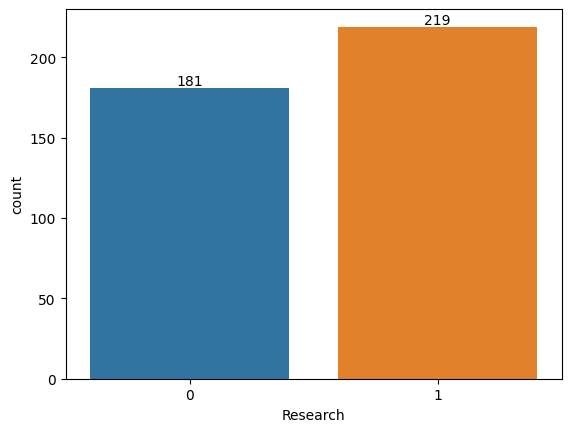

In [9]:
outplot = sns.countplot(data = df, x = 'Research')
outplot.bar_label(outplot.containers[0])

In [81]:
df['Admit'] = (df['Chance of Admit '] > 0.8).astype(int)
df = df.drop('Chance of Admit ', axis=1)

In [84]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


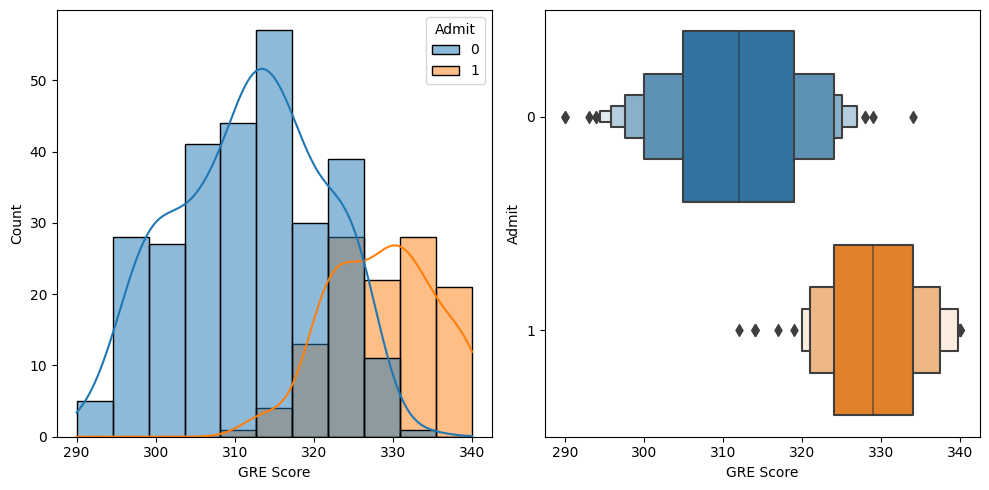

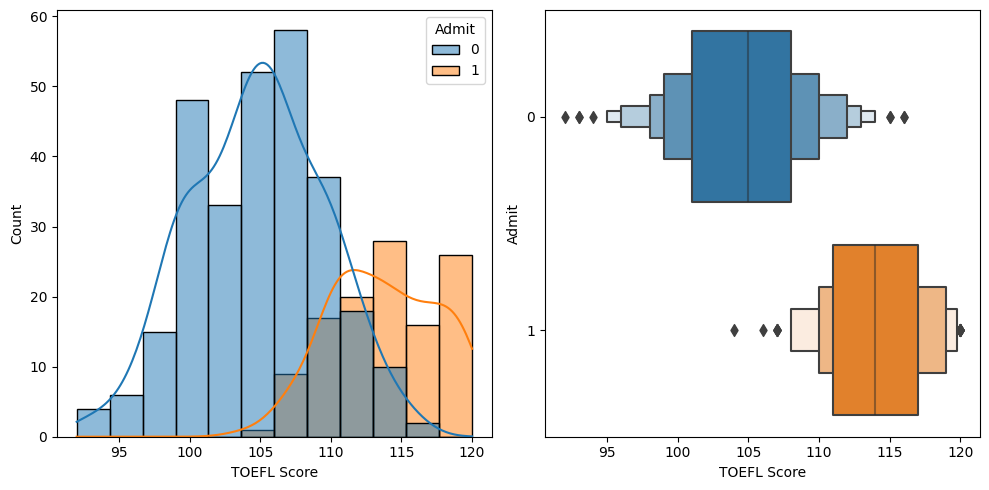

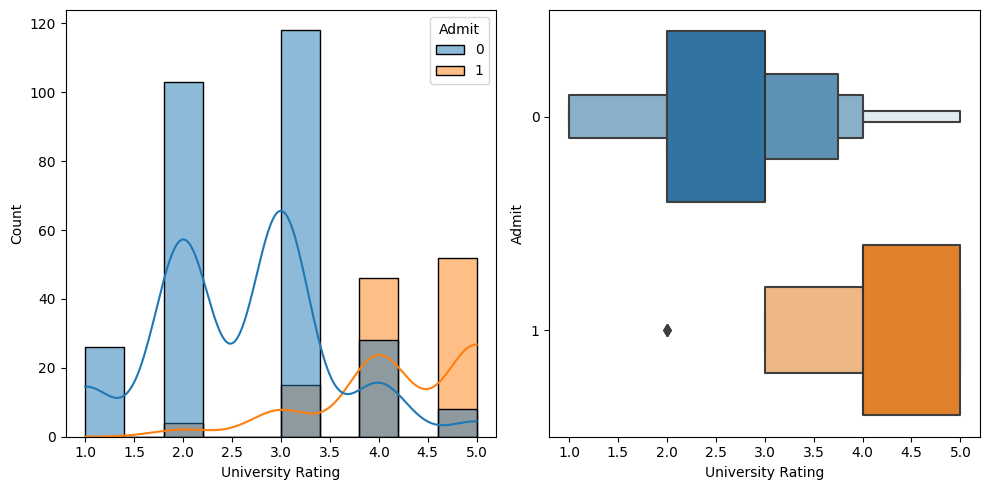

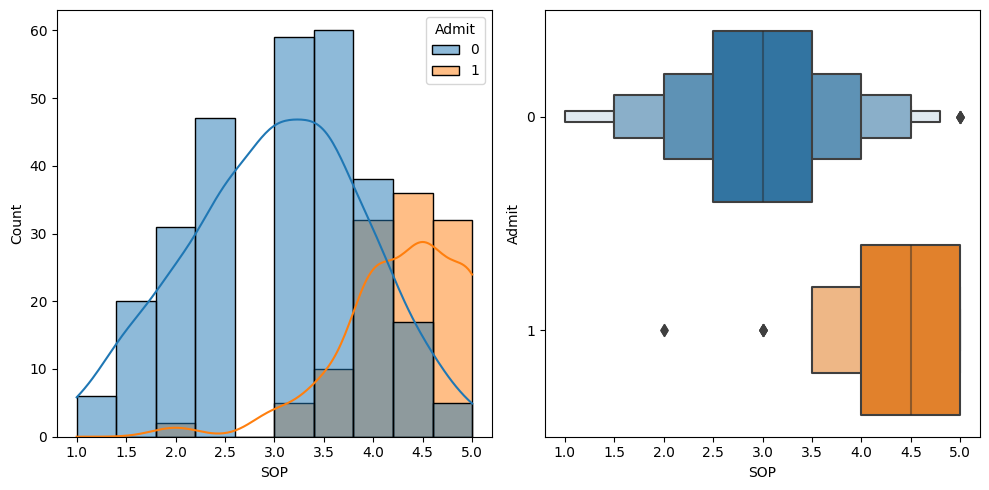

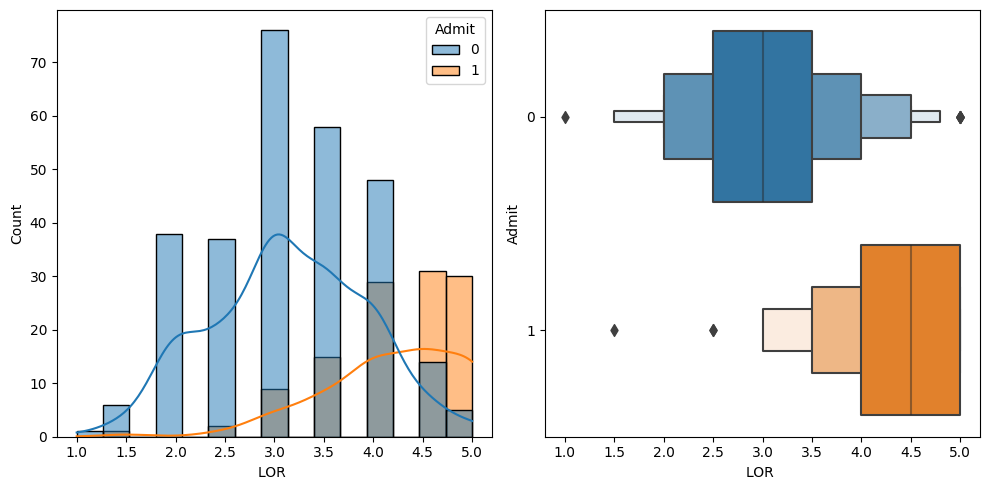

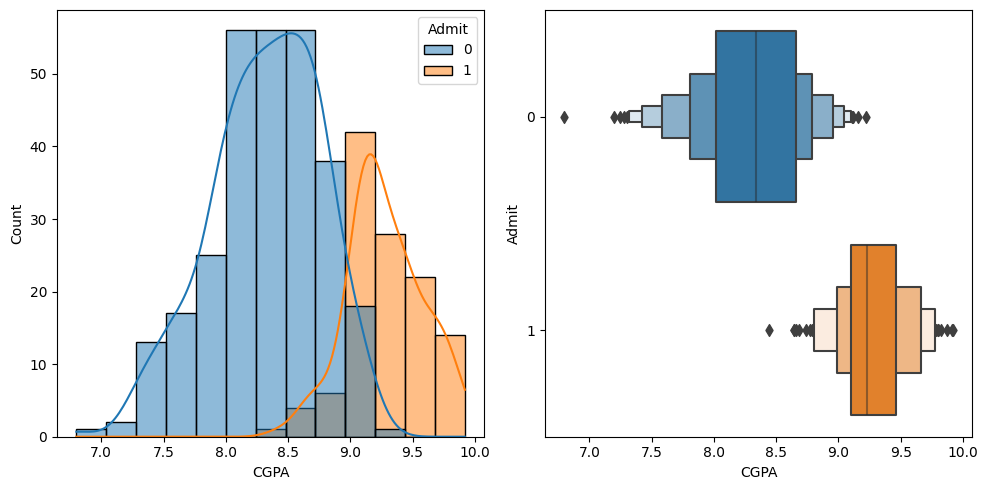

ValueError: ignored

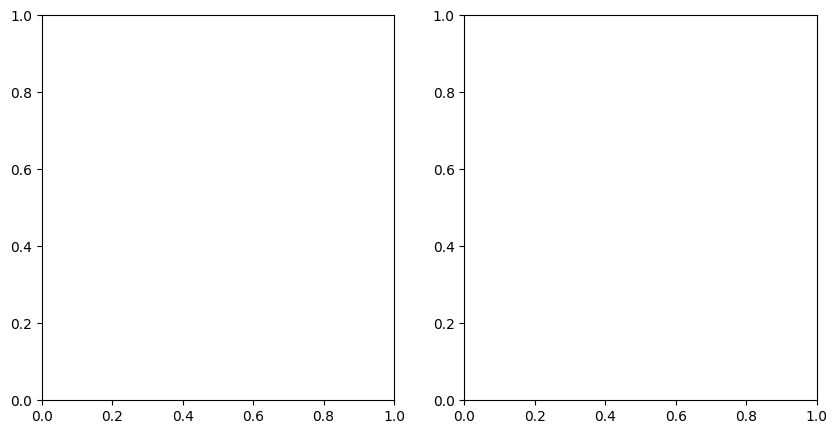

In [85]:
def admission_predict(col):
    fig , axs = plt.subplots(nrows=1, ncols=2 , figsize=(10,5) , sharex=True)
    axs = axs.ravel()

    sns.histplot(data=df, x=col, kde=True, hue='Admit', ax=axs[0])
    sns.boxenplot(data=df, x=col, y='Admit', orient='h', ax=axs[1])
    plt.tight_layout()
    plt.show()
    print('\n')


for col in col_dist :
    admission_predict(col)


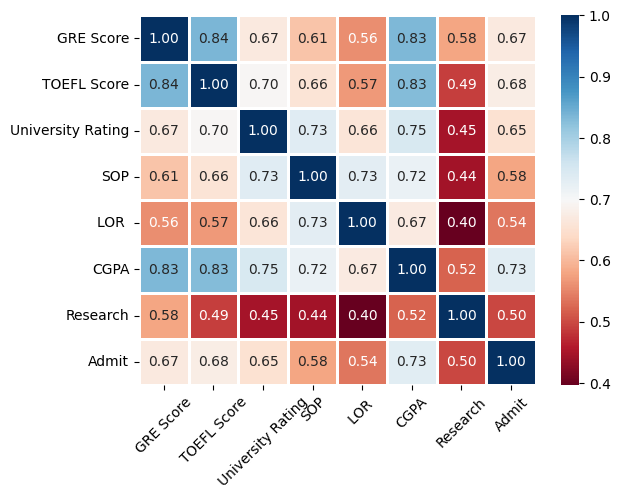

In [86]:
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', cmap='RdBu', linewidths=2)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()

LINEAR REGRESSION


In [111]:
caminho_arquivo = '/content/drive/MyDrive/ada_tech/machine_learning_II/Admission_PredictV2.csv'
df = pd.read_csv(caminho_arquivo)
df.drop("Serial No.", axis=1, inplace=True)

In [112]:
df['Admit'] = (df['Chance of Admit '] > 0.8).astype(int)
df = df.drop('Chance of Admit ', axis=1)

In [114]:
from sklearn.model_selection import train_test_split

# Separar o conjunto de dados em recursos (X) e rótulos (y)
x = df.drop('Admit', axis=1)
y = df['Admit']

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=42, stratify = y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
==== Avaliação no conjunto de treinamento ====


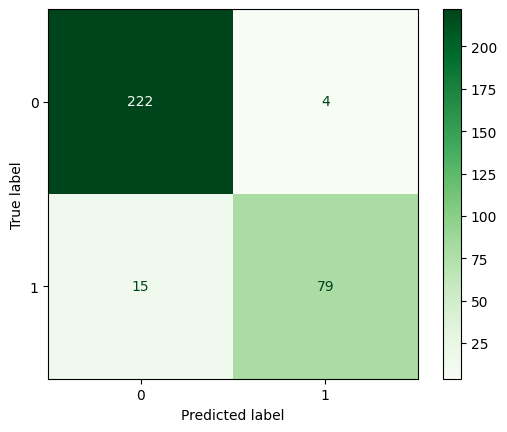

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       226
           1       0.95      0.84      0.89        94

    accuracy                           0.94       320
   macro avg       0.94      0.91      0.93       320
weighted avg       0.94      0.94      0.94       320


==== Avaliação no conjunto de teste ====


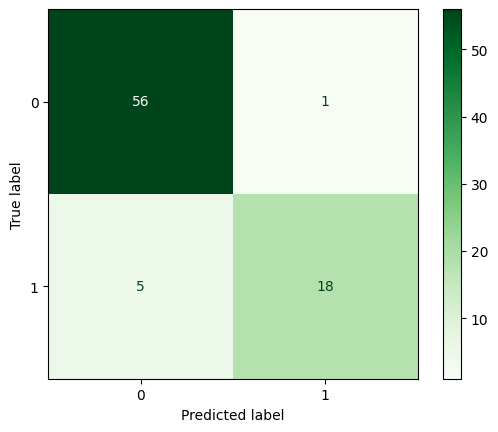

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        57
           1       0.95      0.78      0.86        23

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

Score ROC: 0.8825324180015255


In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definir o espaço de parâmetros para o Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Valores regulares de C
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algoritmos de otimização
    'class_weight': [None, 'balanced']  # Ponderação das classes
}

log_reg = LogisticRegression(random_state=42, max_iter=10000)

grid_lr = GridSearchCV(
    estimator = log_reg,
    param_grid = param_grid,
    scoring = 'f1_weighted',
    cv=5,  # numero de folds
    verbose=1
)

# Ajustar o Grid Search ao conjunto de dados de treinamento
grid_lr.fit(x_train, y_train)

# Avaliar o melhor modelo encontrado pelo Grid Search no conjunto de teste
best_model_lr = grid_lr.best_estimator_
y_pred = best_model.predict(x_test)

# Avaliação no conjunto de treinamento APLICANDO O GRID_RF
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_lr.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,cmap='Greens')
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_lr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,cmap='Greens')
roc_auc = roc_auc_score(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f'Score ROC: {roc_auc}')

RANDOM FOREST CLASSIFIER

In [10]:
caminho_arquivo = '/content/drive/MyDrive/ada_tech/machine_learning_II/Admission_PredictV2.csv'
df = pd.read_csv(caminho_arquivo)
df.drop("Serial No.", axis=1, inplace=True)

In [11]:
df['Admit'] = (df['Chance of Admit '] > 0.8).astype(int)
df = df.drop('Chance of Admit ', axis=1)

In [12]:
seed = 41
features = df.drop('Admit', axis=1)
target = df['Admit']

x_train, x_test, y_train, y_test = train_test_split( features, target, test_size = 0.3, shuffle=True, random_state = seed, stratify=target)

In [13]:
pipe_rf = Pipeline([
        ('scaler', StandardScaler()) ,
        ('RandomForest', RandomForestClassifier(random_state=seed))
    ])
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestClassifier(random_state=41))])

==== Avaliação no conjunto de treinamento ====


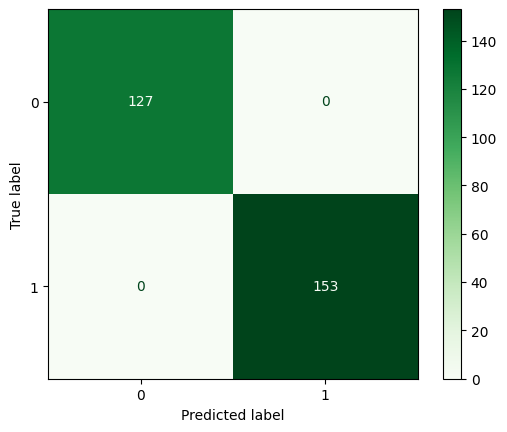

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       153

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280


==== Avaliação no conjunto de teste ====


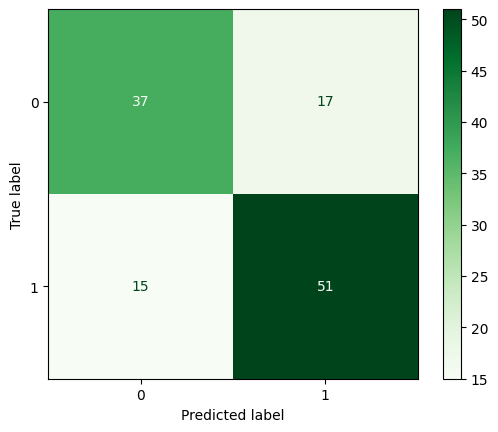

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        54
           1       0.75      0.77      0.76        66

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120

Score ROC: 0.7289562289562289


In [126]:
# Definir o espaço de parâmetros para o Grid Search

paramns_grid = {"RandomForest__n_estimators": [100,1000],
                'RandomForest__max_depth': [5,10],
               'RandomForest__class_weight': [None, 'balanced']}

grid_rf = GridSearchCV(estimator = pipe_rf,
                       param_grid = paramns_grid,
                       scoring = 'f1_weighted')

grid_rf.fit(x_train, y_train)

grid_best_rf = grid_rf.best_estimator_

# Avaliação no conjunto de treinamento APLICANDO O GRID_RF
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_best_rf.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,cmap='Greens')
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_best_rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,cmap='Greens')
roc_auc = roc_auc_score(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f'Score ROC: {roc_auc}')



==== Avaliação no conjunto de treinamento ====


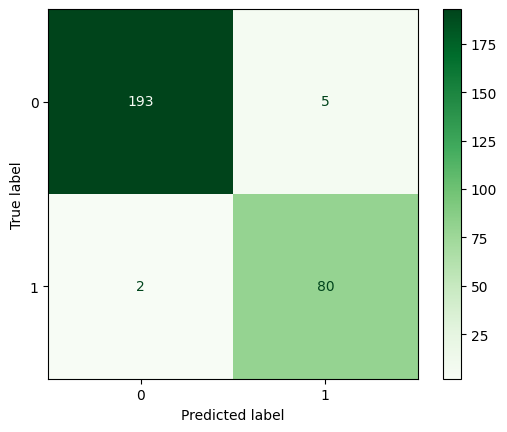

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       0.94      0.98      0.96        82

    accuracy                           0.97       280
   macro avg       0.97      0.98      0.97       280
weighted avg       0.98      0.97      0.98       280


==== Avaliação no conjunto de teste ====


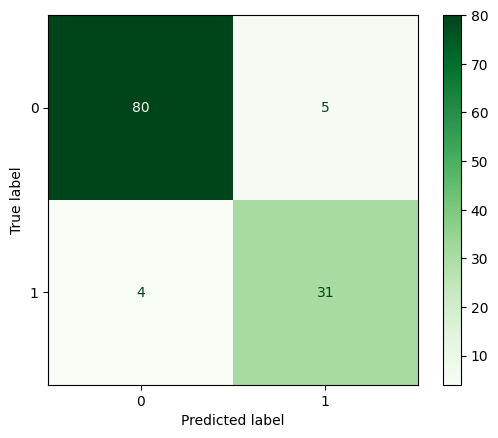

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        85
           1       0.86      0.89      0.87        35

    accuracy                           0.93       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.93      0.93      0.93       120

Score ROC: 0.9134453781512605


In [14]:
# Definir o espaço de parâmetros para o Grid Search

paramns_grid = {
    "RandomForest__n_estimators": [100, 500, 1000], # número de arvores, quanto mais melhor.
    'RandomForest__max_depth': [ 5, 10, 15],
    'RandomForest__min_samples_split': [2, 5, 10],
    'RandomForest__min_samples_leaf': [1, 2, 4],
    'RandomForest__class_weight': [None, 'balanced'],
    'RandomForest__bootstrap': [True, False]
}

grid_rf = GridSearchCV(estimator = pipe_rf,
                       param_grid = paramns_grid,
                       scoring = 'f1_weighted',
                       n_jobs=-1)

grid_rf.fit(x_train, y_train)

grid_best_rf = grid_rf.best_estimator_

# Avaliação no conjunto de treinamento APLICANDO O GRID_RF
print("==== Avaliação no conjunto de treinamento ====")
y_pred_train = grid_best_rf.predict(x_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,cmap='Greens')
plt.show()
print(classification_report(y_train, y_pred_train))

print("\n==== Avaliação no conjunto de teste ====")
y_pred_test = grid_best_rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,cmap='Greens')
roc_auc = roc_auc_score(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))
print(f'Score ROC: {roc_auc}')



DECISION TREE

In [15]:
caminho_arquivo = '/content/drive/MyDrive/ada_tech/machine_learning_II/Admission_PredictV2.csv'
df = pd.read_csv(caminho_arquivo)
df.drop("Serial No.", axis=1, inplace=True)

In [16]:
df['Admit'] = (df['Chance of Admit '] > 0.8).astype(int)
df = df.drop('Chance of Admit ', axis=1)

In [17]:
seed=41
features = df.drop('Admit', axis=1)
target = df['Admit']

x_train, x_test, y_train, y_test = train_test_split( features, target, test_size = 0.3, shuffle=True, random_state = seed, stratify=target)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Metricas de avaliação de TREINO
[[191   7]
 [ 10  72]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       198
           1       0.91      0.88      0.89        82

    accuracy                           0.94       280
   macro avg       0.93      0.92      0.93       280
weighted avg       0.94      0.94      0.94       280

Metricas de avaliação de TESTE
[[79  6]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        85
           1       0.84      0.91      0.88        35

    accuracy                           0.93       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120



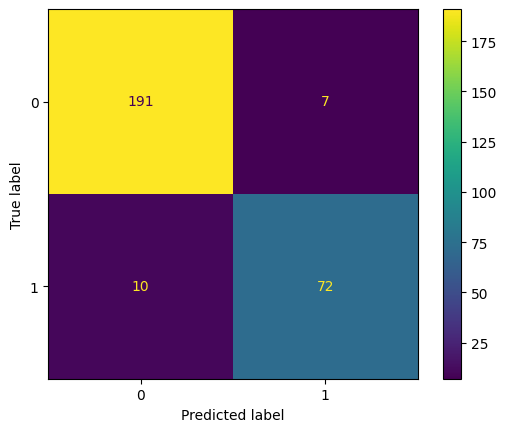

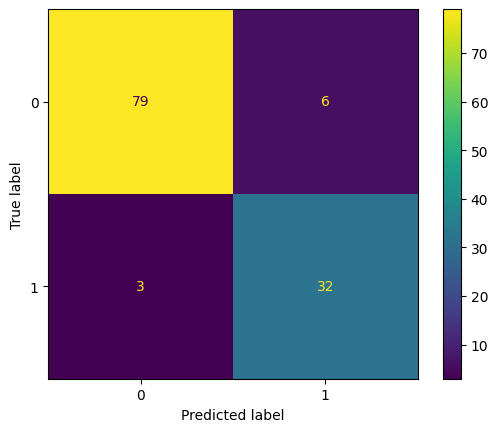

In [21]:
# GINI Medida de desigualdade de distribuição. Se um evento tem probabilidade semelhante aos outros eventos ou se tem maior peso.

# ENTROPY Medida da distribuição de probabilidade de eventos. Se todos os eventos tem a mesma probabilidade de ocorrer a entropia
# é alta porque pode ocorrer qualquer coisa.

#PRECISION: TUDO QUE É CLASSIFICADO COMO POSITIVO, QUANTO É POSITIVO DE FATO ( QUANTOS POSITIVOS FORAM ACERTADOS )
#RECALL: DE TUDO QUE É POSITIVO DE VERDADE, QUANTO O MEU PODELO E CAPAZ DE DETECTAR POSITIVO
#F1 MEDIA HARMONICA ENTRE PRECISAO E RECALL


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2, 20)
}

# StratifiedKFold para validação cruzada
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# DecisionTreeClassifier como o estimador
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV com o DecisionTreeClassifier como estimador
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_grid_dt,
                       scoring='f1_weighted',
                       cv=splitter)

# Agora você pode ajustar grid_dt aos seus dados
# grid_dt.fit(X, y)


grid_dt.fit(x_train, y_train)
grid_best_dt = grid_dt.best_estimator_


print("Metricas de avaliação de TREINO")
y_pred_train = grid_best_dt.predict(x_train)
print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
print(classification_report(y_train, y_pred_train))

print("Metricas de avaliação de TESTE")
y_pred_test = grid_best_dt.predict(x_test)
print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))




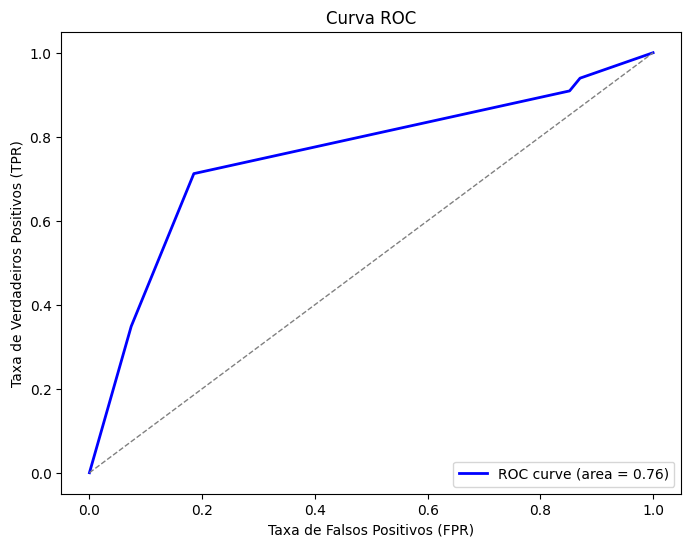

In [64]:
probabilidades = grid_dt.predict_proba(x_test)[:, 1]  # Probabilidades da classe 1

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilidades)

# Calcular a área sob a curva ROC (AUC)
auc = roc_auc_score(y_test, probabilidades)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

KNN


In [3]:
caminho_arquivo = '/content/drive/MyDrive/ada_tech/machine_learning_II/Admission_PredictV2.csv'
df = pd.read_csv(caminho_arquivo)
df.drop("Serial No.", axis=1, inplace=True)

In [4]:
df['Admit'] = (df['Chance of Admit '] > 0.8).astype(int)
df = df.drop('Chance of Admit ', axis=1)

In [ ]:
pip install mlxtend

In [7]:
x = df.drop(columns = "Admit")
y = df['Admit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=72, stratify = y)

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


 Melhor parametro K {'n_neighbors': 3}
 Melhor score K -0.06785714285714287
3
******************************
METRICAS DE CLASSIFICAÇÃO
 Valor K: 3 
Acuracia: 0.9 
Recall: 0.8571428571428571 
F1: 0.8333333333333334 
Roc Auc: 0.8873949579831932


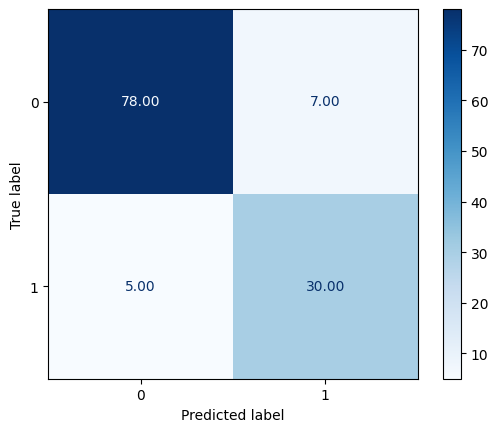

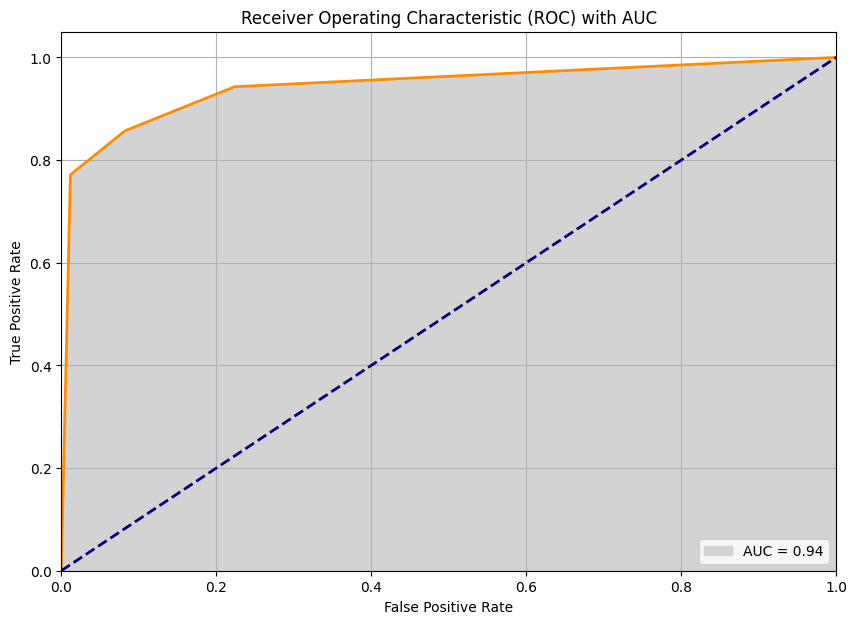

In [14]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

splitter = KFold( n_splits = 10, shuffle = True, random_state = 72)
metric = 'neg_mean_absolute_error'
param_grid = {'n_neighbors': range(2,90)}
knn_class = KNeighborsClassifier()

grid_knn_class = GridSearchCV(estimator = knn_class,
                              param_grid = param_grid,
                              scoring = metric,
                              cv = splitter)

grid_knn_class.fit(x_train_scaled, y_train)

print(f' Melhor parametro K {grid_knn_class.best_params_}')
print(f' Melhor score K {grid_knn_class.best_score_}')

optimal_k = grid_knn_class.best_params_['n_neighbors']
print(optimal_k)


knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(x_train_scaled, y_train)
y_pred = knn_final.predict(x_test_scaled)

y_pred_prob = knn_final.predict_proba(x_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(values_format='.2f', cmap='Blues')


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('*'*30)
print("METRICAS DE CLASSIFICAÇÃO")
print(f' Valor K: {optimal_k} \nAcuracia: {accuracy} \nRecall: {recall} \nF1: {f1} \nRoc Auc: {roc_auc}')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.fill_between(fpr, tpr, color='lightgrey', label='AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with AUC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

SVM

In [4]:
caminho_arquivo = '/content/drive/MyDrive/ada_tech/machine_learning_II/Admission_PredictV2.csv'
df = pd.read_csv(caminho_arquivo)
df.drop("Serial No.", axis=1, inplace=True)

In [5]:
df['Admit'] = (df['Chance of Admit '] > 0.8).astype(int)
df = df.drop('Chance of Admit ', axis=1)

In [6]:
x = df.drop(columns = "Admit")
y = df['Admit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=72, stratify = y)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Metricas de avaliação de TREINO
[[189   9]
 [  8  74]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       198
           1       0.89      0.90      0.90        82

    accuracy                           0.94       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.94      0.94      0.94       280

Metricas de avaliação de TESTE
[[77  8]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        85
           1       0.80      0.91      0.85        35

    accuracy                           0.91       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.92      0.91      0.91       120



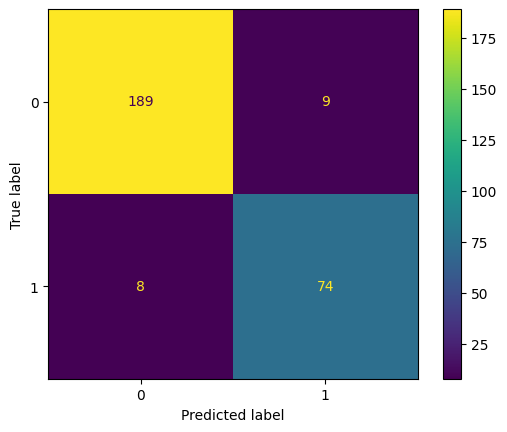

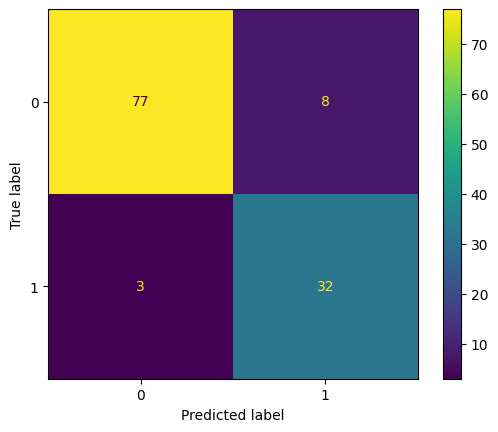

In [8]:
from sklearn.svm import SVC


param_grid_svc = {
    'C': [ 1, 10, 100], # Regularização
    'gamma': ['scale', 'auto'], # Kernel coefficient
    'kernel': ['rbf', 'linear', 'sigmoid'] # Tipo de kernel
}

svc = SVC()

# Configure o GridSearchCV
grid_svc = GridSearchCV(estimator = svc,
                        param_grid = param_grid_svc,
                        cv=5,
                        scoring = 'accuracy',
                        n_jobs = -1)

grid_svc.fit(x_train, y_train)

grid_best_svc = grid_svc.best_estimator_


print("Metricas de avaliação de TREINO")
y_pred_train = grid_best_svc.predict(x_train)
print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
print(classification_report(y_train, y_pred_train))

print("Metricas de avaliação de TESTE")
y_pred_test = grid_best_svc.predict(x_test)
print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))
